# Stocks A1 - AMZN
## submission 1

exploratory analysis

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [48]:
data = pd.read_csv("AMZN_2006-01-01_to_2018-01-01.csv")

In [49]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

## Visualization & EDA
- (0.5p) a visualization for the data that is appropriate for time-series, and initial 

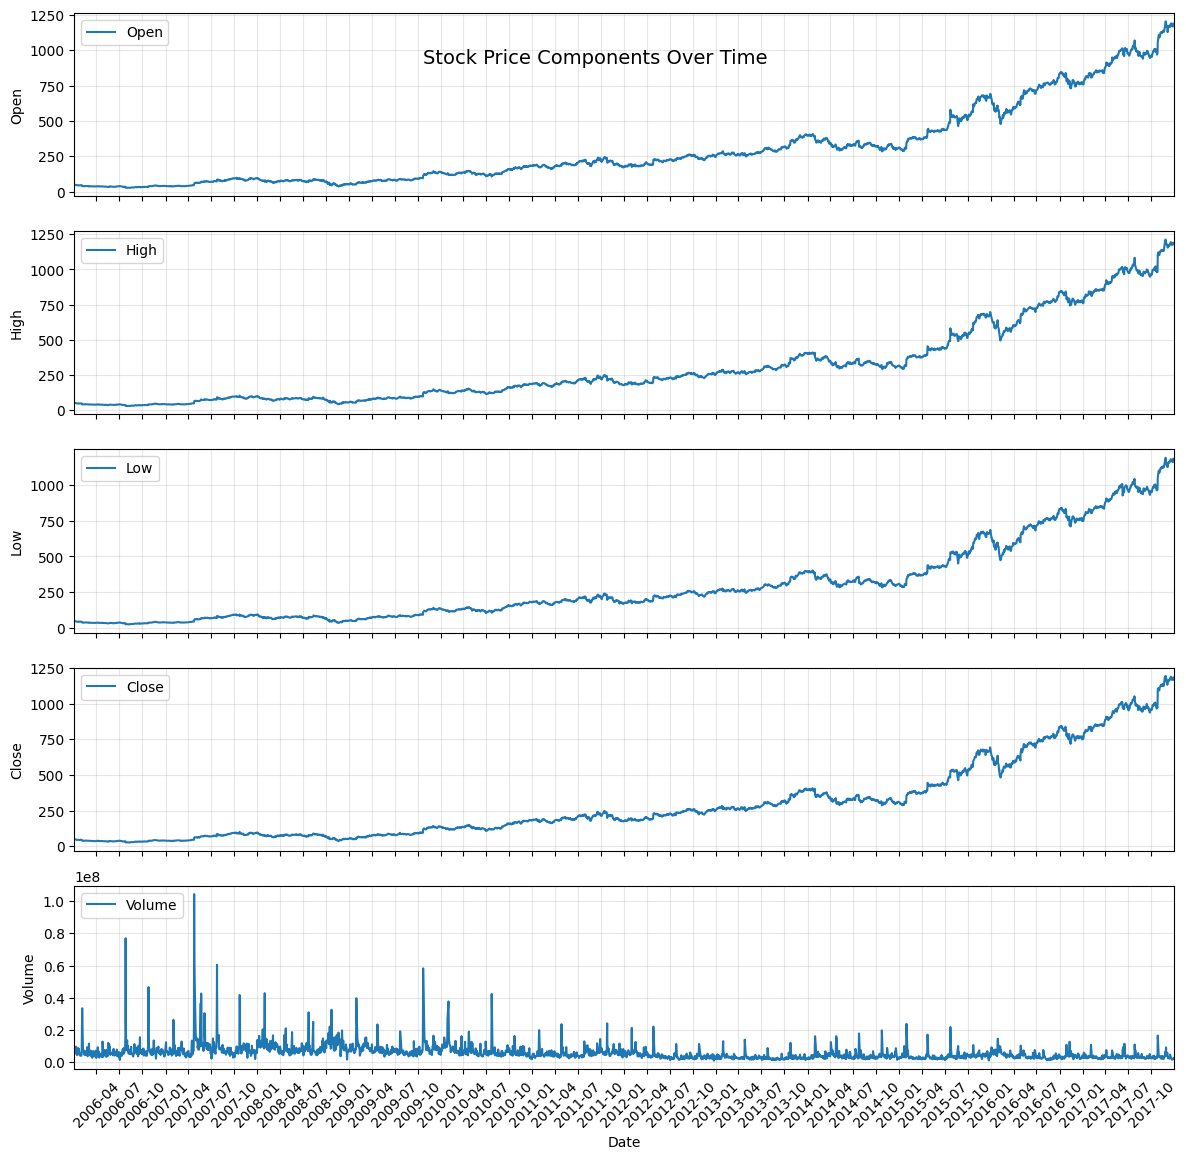

In [50]:
# make sure Date is datetime
data["Date"] = pd.to_datetime(data["Date"])

fig, axes = plt.subplots(5, 1, figsize=(12, 12), sharex=True)
price_cols = ["Open", "High", "Low", "Close", "Volume"]

for i, col in enumerate(price_cols):
    axes[i].plot(data["Date"], data[col], label=col, color="tab:blue")
    axes[i].set_ylabel(col)
    axes[i].legend(loc="upper left")
    axes[i].grid(True, alpha=0.3)

# set quarterly ticks on x-axis
axes[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
axes[-1].tick_params(axis="x", rotation=45)

# set start and end dates
start = data["Date"].min()
end = data["Date"].max()
start = pd.Timestamp(start)
end = pd.Timestamp(end)
axes[-1].set_xlim([start, end])

axes[-1].set_xlabel("Date")
fig.suptitle("Stock Price Components Over Time", fontsize=14, y=0.93)
plt.tight_layout()
plt.show()

In [51]:
# check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


**Comment**

- the data is continuous

In [52]:
data = data.sort_values("Date")
diffs = data["Date"].diff()
print(diffs.value_counts().head())

Date
1 days    2366
3 days     545
4 days      77
2 days      27
5 days       3
Name: count, dtype: int64


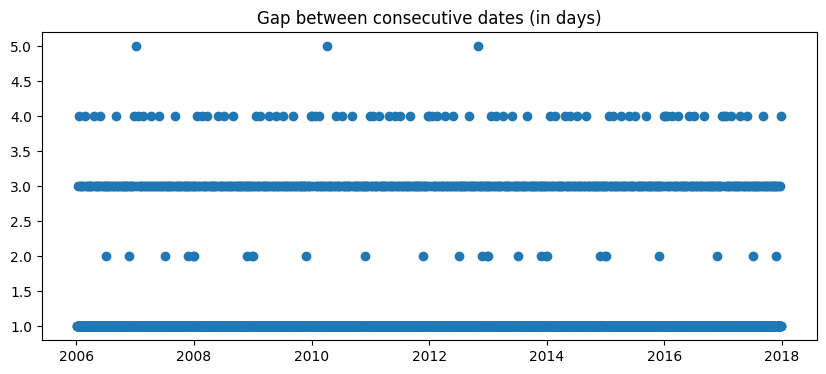

In [53]:
plt.figure(figsize=(10, 4))
plt.scatter(data["Date"], diffs.dt.days)
plt.title("Gap between consecutive dates (in days)")
plt.show()

**Comment**

- discontinuous dates

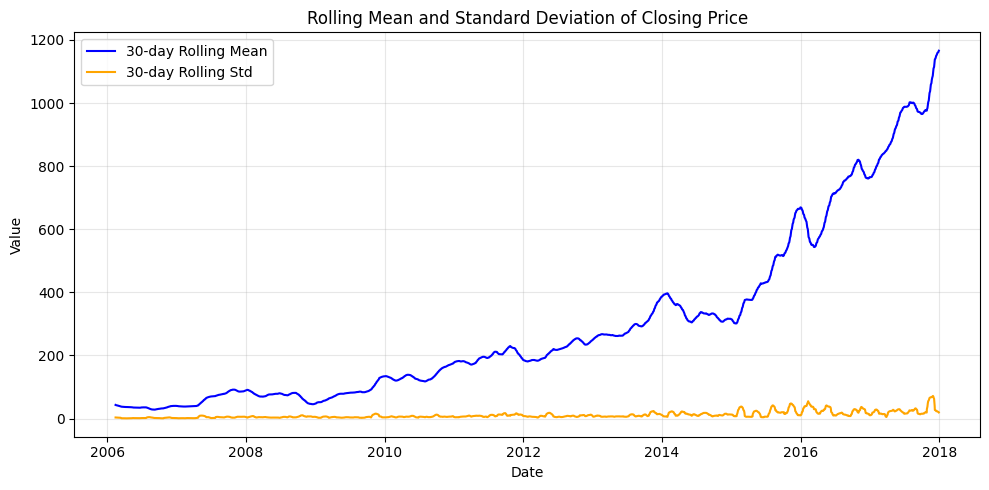

In [54]:
plt.figure(figsize=(10, 5))

plt.plot(
    data["Date"],
    data["Close"].rolling(30).mean(),
    label="30-day Rolling Mean",
    color="blue",
)
plt.plot(
    data["Date"],
    data["Close"].rolling(30).std(),
    label="30-day Rolling Std",
    color="orange",
)

plt.title("Rolling Mean and Standard Deviation of Closing Price")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Observations**
- We can see from the rolling blue line that there is a clear upward trend in the closing price over time which shows the stock grows consistently over time.
- The standard deviation (orange line) remains relatively low and stable, which shows that the stock does not have high volatility for most of the time. However, there are some periods from 2015-17, where the standard deviation has minor spikes, indicating increased volatility during those times.

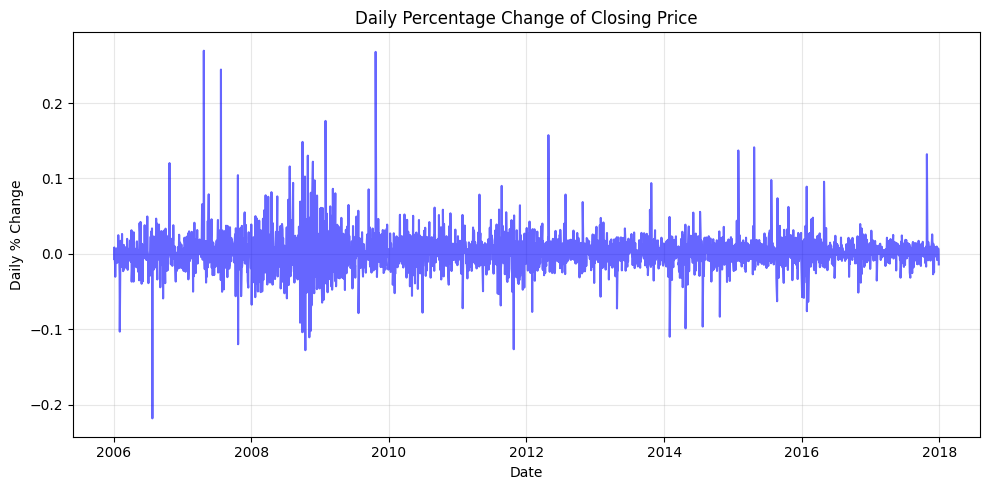

In [55]:
data["daily_change"] = data["Close"].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(data["Date"], data["daily_change"], color="blue", alpha=0.6)

plt.title("Daily Percentage Change of Closing Price")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Observations**
- The stock experienced significant volatility during the early years like 2007-2008. There are some other spike as well but for the most part the price is centered around zero, indicating that daily changes are generally small.

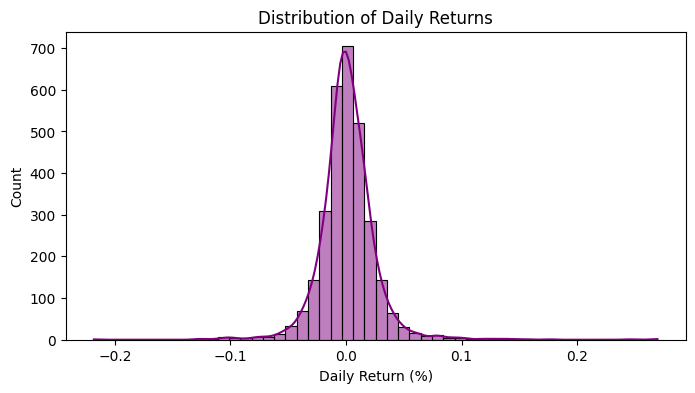

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Close"].pct_change().dropna(), bins=50, kde=True, color="purple")
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.show()

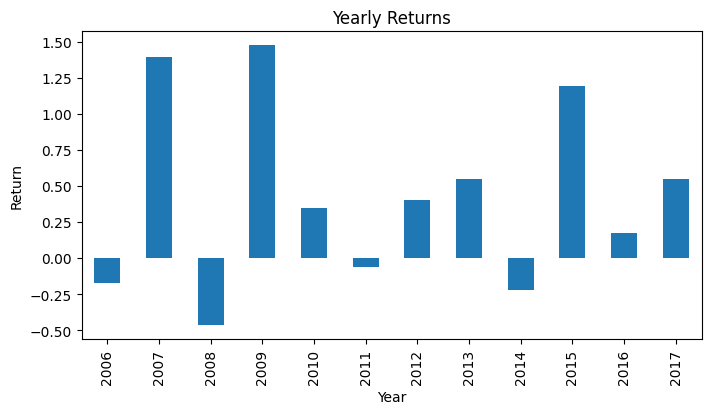

In [ ]:
data["Year"] = data["Date"].dt.year
yearly_returns = data.groupby("Year")["Close"].apply(
    lambda x: x.iloc[-1] / x.iloc[0] - 1
)
yearly_returns.plot(kind="bar", figsize=(8, 4))
plt.title("Yearly Returns")
plt.ylabel("Return")
plt.show()

**Observations**
- The yearly returns show fluctuations with alternating positive and negative years.
- Strong positive increase can be seen in 2007, 2009, 2013, 2015, and 2017, while 2008, 2011, and 2014 experienced losses.
- Overall the stock shows a positive long-term trend, which reflects consistent growth over the period.

## Time-series analysis

- (0.5p) a time-series decomposition analysis of long-term trend, seasonality, and residuals

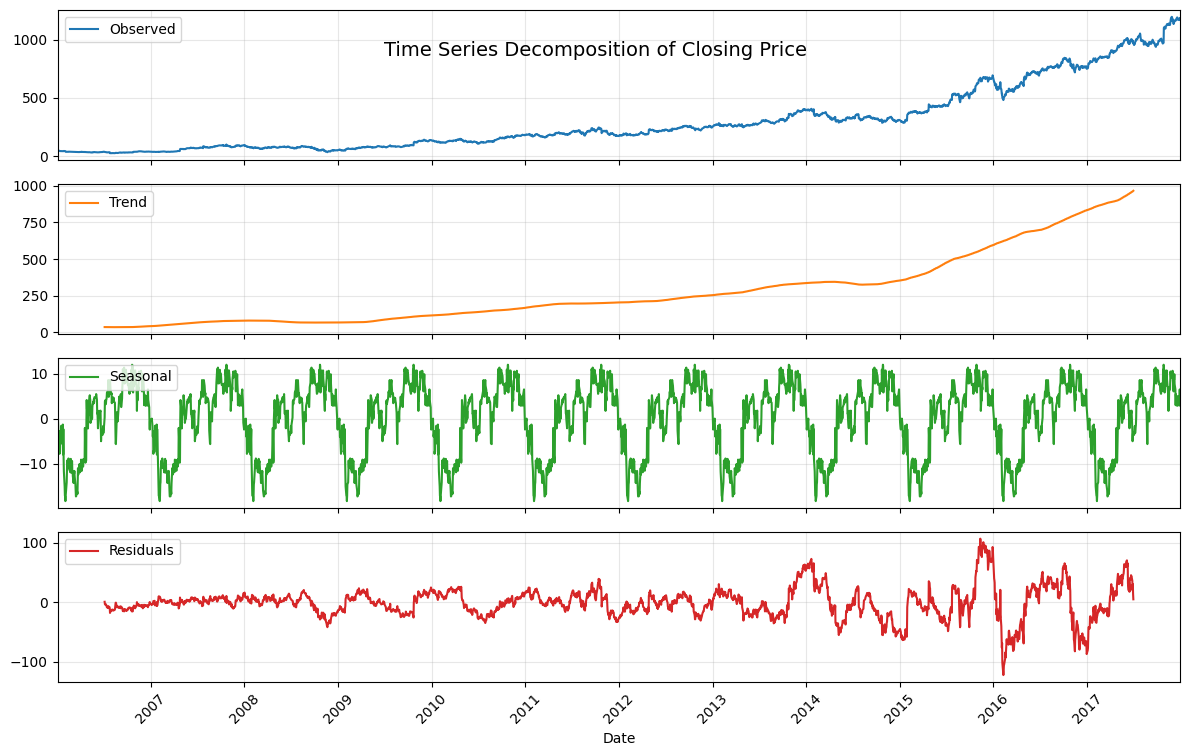

In [57]:
# decompose (use just the values, but keep Date column for plotting)
result = seasonal_decompose(data["Close"], model="additive", period=252)

# manual plotting with Date on x-axis
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axes[0].plot(data["Date"], result.observed, label="Observed", color="tab:blue")
axes[1].plot(data["Date"], result.trend, label="Trend", color="tab:orange")
axes[2].plot(data["Date"], result.seasonal, label="Seasonal", color="tab:green")
axes[3].plot(data["Date"], result.resid, label="Residuals", color="tab:red")

for ax in axes:
    ax.legend(loc="upper left")
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.tick_params(axis="x", rotation=45)

# set start and end dates
start = pd.to_datetime(data["Date"].min())
end = pd.to_datetime(data["Date"].max())
axes[-1].set_xlim([start, end])

axes[-1].set_xlabel("Date")
fig.suptitle("Time Series Decomposition of Closing Price", fontsize=14, y=0.9)
plt.tight_layout()
plt.show()

**Comment**

- top plot showing the closing price normally
- the trend line of the closing prices (smooth)
- seasonality plot shows how trends are repeating, every year in this case
- residuals show how much of the current data cannot be explained by the trend or seasonality (a completely flat line would mean the model has captured all systematic patterns and only random noise remains)

## Autocorrelation Analysis

- (0.5p) An autocorrelation analysis of the dataset

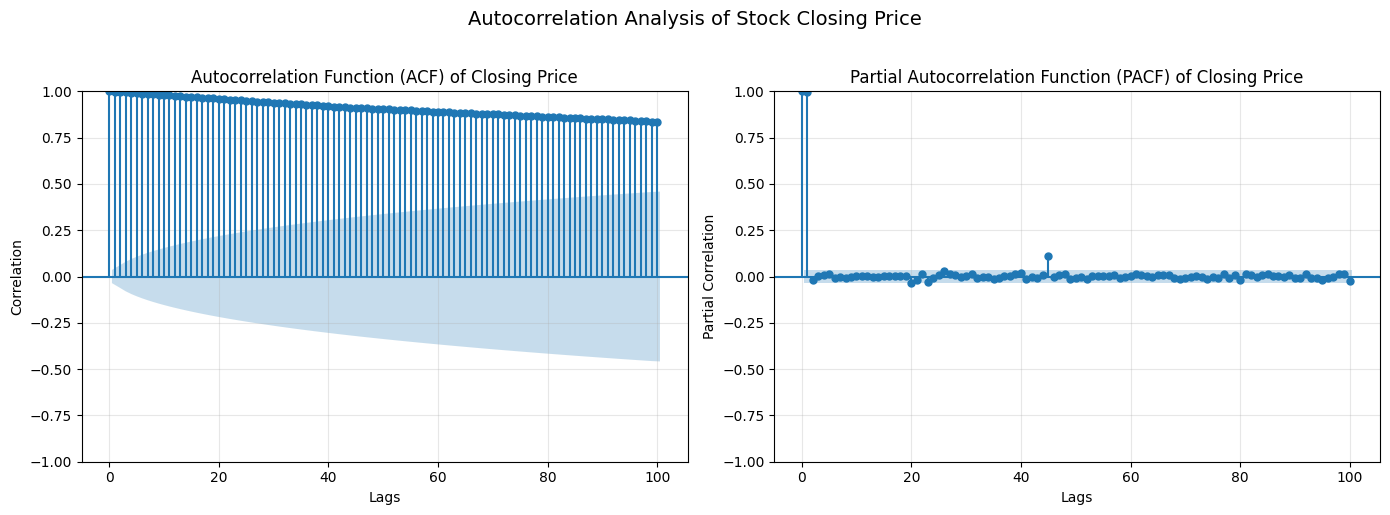

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(data["Close"], ax=axes[0], lags=100, alpha=0.05)
axes[0].set_title("Autocorrelation Function (ACF) of Closing Price", fontsize=12)
axes[0].set_xlabel("Lags")
axes[0].set_ylabel("Correlation")
axes[0].grid(alpha=0.3)

plot_pacf(data["Close"], ax=axes[1], lags=100, alpha=0.05, method="ywm")
axes[1].set_title(
    "Partial Autocorrelation Function (PACF) of Closing Price", fontsize=12
)
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Partial Correlation")
axes[1].grid(alpha=0.3)

fig.suptitle("Autocorrelation Analysis of Stock Closing Price", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

**comment**
- Correlation between consecutive values.
- The ACF (Autocorrelation Function) plot shows very high correlation values across many lags.
- This indicates that the closing prices are highly dependent on their past values and exhibit a strong trend.

- For the PACF (Partial ACF) plot, we observe that only the first lag is significant while the rest quickly drop off.

## Partitioning plan

- (0.5p) a plan for partitioning the time-series data for model formation

**Plan**

- traditional partitioning does not work for time-series data
- continuous chunks need to be kept together in order for the trend to be representative
- k-fold would work quite well, as that takes multiple chunks in a rolling window manner, capturing multiple smaller instances of the data and its trend with it